In [99]:
import pandas as pd
import os
import glob
import datetime
import matplotlib.pyplot as plt

## combining all pbp csv files 

## reading combined csv files

In [ ]:
df = pd.read_csv("/Users/victortu/Desktop/Python Projects/Dame/Generated csv files/combined_pbp_csv.csv")
df.head()

## filtering original csv for necessary data 

In [71]:
#filter POR away/home 
filtloc = df.loc[(df["AwayTeam"] == "POR") | (df["HomeTeam"] == "POR")]

#filter for the rest of the conditions 
filtcond = filtloc.loc[(df["Quarter"] == 4) & (df["SecLeft"] <= 120) & (df["Shooter"] == "D. Lillard - lillada01")]

#filter for necessary columns
damestats = filtcond[["Date","AwayPlay", "HomePlay", "SecLeft","Shooter","ShotOutcome","ShotType"]]

#combining AwayPlay and HomePlay columns
damestats.columns = damestats.columns.str.replace('.*?Play', 'Play', regex = True)

#stack
s = damestats.stack() 
s
    
#unstack
damestats = s.unstack()

#converting date column to a datetime format  
damestats['Date'] = pd.to_datetime(df['Date'])

## filtering damestats for specific seasons

In [ ]:
#filtering for 2015-2016 season 
start_date = "10-27-2015"
end_date = "06-19-2016"

mask = (damestats["Date"] > start_date) & (damestats["Date"] <= end_date)

damestats16 = damestats.loc[mask]

#export damestats16 to csv 
damestats16.to_csv(r'/Users/victortu/Desktop/Python Projects/DameTime/Generated csv files/damestats16.csv')

In [82]:
#filtering for 2016-2017 season
start_date = "10-25-2016"
end_date = "06-18-2017"

mask = (damestats["Date"] > start_date) & (damestats["Date"] <= end_date)

damestats17 = damestats.loc[mask]

#export damestats17 to csv 
damestats17.to_csv(r'/Users/victortu/Desktop/Python Projects/DameTime/Generated csv files/damestats17.csv')

In [85]:
#filtering for 2017-2018 season
start_date = "10-17-2017"
end_date = "06-17-2018"

mask = (damestats["Date"] > start_date) & (damestats["Date"] <= end_date)

damestats18 = damestats.loc[mask]

#export damestats18 to csv 
damestats18.to_csv(r'/Users/victortu/Desktop/Python Projects/DameTime/Generated csv files/damestats18.csv')

In [88]:
#filtering for 2018-2019 season
start_date = "10-16-2018"
end_date = "06-10-2019"

mask = (damestats["Date"] > start_date) & (damestats["Date"] <= end_date)

damestats19 = damestats.loc[mask]

#export damestats19 to csv 
damestats19.to_csv(r'/Users/victortu/Desktop/Python Projects/DameTime/Generated csv files/damestats19.csv')

In [91]:
#filtering for 2019-2020 season
start_date = "10-22-2019"
end_date = "10-11-2020"

mask = (damestats["Date"] > start_date) & (damestats["Date"] <= end_date)

damestats20 = damestats.loc[mask]

#export damestats20 to csv 
damestats20.to_csv(r'/Users/victortu/Desktop/Python Projects/DameTime/Generated csv files/damestats20.csv')

In [120]:
#filtering for 2020-2021 season
start_date = "12-22-2020"
end_date = "07-20-2021"

mask = (damestats["Date"] > start_date) & (damestats["Date"] <= end_date)

damestats21 = damestats.loc[mask]

#export damestats21 to csv 
damestats21.to_csv(r'/Users/victortu/Desktop/Python Projects/DameTime/Generated csv files/damestats21.csv')

## functions for analysis

In [111]:
#function for calculating 3-pt shot percentage 
def threeptcalc(df):
    
    #filters damestats to show only 3-point attempts
    dt3 = df[df.Play.str.contains("3-pt")]
    
    #number of 3-pointers attempted
    shotattempts3 = len(dt3.index)
    
    #filters dt3 to show only made attempts
    dt3made = dt3[dt3.ShotOutcome.str.contains("make")]
    
    #number of 3-pointers made
    madeshots3 = len(dt3made.index)
    
    #3-point shot make percentage 
    shotper3 = madeshots3 / shotattempts3 * 100
    
    #limits the percent to 2 decimal places 
    rshotper3 = round(shotper3, 2)
    
    return(rshotper3)

In [112]:
#function for calculating 2-pt shot percentage
def twoptcalc(df):
    
    #filters damestats to show only 2-point attempts
    dt2 = df[df.Play.str.contains("2-pt")]
    
    #number of 2-pointers attempted
    shotattempts2 = len(dt2.index)
    
    #filters dt2 to show only made attempts
    dt2made = dt2[dt2.ShotOutcome.str.contains("make")]
    
    #number of 2-pointers made
    madeshots2 = len(dt2made.index)
    
    #2-point shot make percentage
    shotper2 = madeshots2 / shotattempts2 * 100
    
    #limits the percent to 2 decimal places 
    rshotper2 = round(shotper2, 2)
    
    return(rshotper2)

## line charts

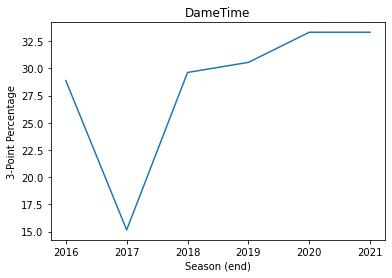

In [122]:
#creating line chart for 3-pt
season = [2016,2017,2018,2019,2020,2021]
threept_percentage = [threeptcalc(damestats16),threeptcalc(damestats17),threeptcalc(damestats18),threeptcalc(damestats19),threeptcalc(damestats20),threeptcalc(damestats21)]

plt.plot(season, threept_percentage)
plt.title('DameTime')
plt.xlabel('Season (end)')
plt.ylabel('3-Point Percentage')
plt.show()

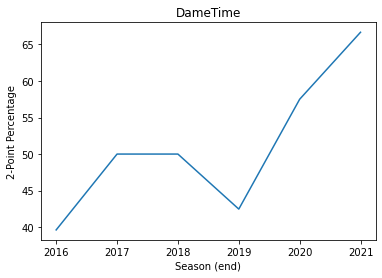

In [123]:
#creating line chart for 2-pt
season = [2016,2017,2018,2019,2020,2021]
threept_percentage = [twoptcalc(damestats16),twoptcalc(damestats17),twoptcalc(damestats18),twoptcalc(damestats19),twoptcalc(damestats20),twoptcalc(damestats21)]

plt.plot(season, threept_percentage)
plt.title('DameTime')
plt.xlabel('Season (end)')
plt.ylabel('2-Point Percentage')
plt.show()